# Parkinson Data

## Notebook for Study of the Hyperparameters of the Gram Matrices of traditional Gaussian Processes Kernels providing evidence for the need of the Fisher Kernel


In [1]:
import numpy as np
import os as os
from pathlib import Path
import matplotlib.pyplot as plt
import time
import seaborn as sn
from sklearn.metrics.pairwise import pairwise_kernels
from matplotlib import cm as CM
import random
from sklearn.gaussian_process.kernels import  (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              WhiteKernel, ConstantKernel) 
from sklearn.model_selection import ParameterGrid
import pandas as pd
import math
import scipy
from numpy.linalg import norm
from sklearn.gaussian_process.kernels import PairwiseKernel

###  Define these kernels over a grid of hyperparameters 

1) Square Exponential \
2) Rational Quadratic \
3) Periodic \
4) Matern \
5) Locally Periodic  \
6) Gaussian Spectral 

In [6]:
#TODO: add missing kernel and set up a nice grid for the simulations
#Constructing grid of hyperparameters. Kernels:
#0 --> SQ. EXP
#1 --> R.Q.
#2 --> Periodic
#3 --> Matern
#4 --> Locally Periodic
#5 --> Gaussian Spectral

family = 0


grid = []

if family == 0:
    grid = {'l': [0.1, 0.5, 2]} 
elif family == 1:
     grid = {'l': [0.1, 2], 'alpha':[0.2, 3]}
elif family == 2:
     grid = {'l': [0.1, 2], 'p':[0.5,1]}
elif family == 3:
     grid = {'l': [0.1, 2], 'nu':[0.5,1]}
elif family == 4:
     grid = {'l1': [0.1, 2], 'l2':[0.1, 2], 'p':[0.5,1]}
elif family == 5:
     grid = {'l': [2, 10], 'mu':[0.5,1]}
           


final_grid = list(ParameterGrid(grid)) 
final_grid

[{'l': 0.1}, {'l': 0.5}, {'l': 2}]

In [7]:
#Constructing the kernel functions - note that for the Gaussian Spectral the procedure is slightly different

def gaus_spec_kernel (x,y):
    dist1 = norm(x-y)
    dist2 = np.sqrt(norm(x-y))
    final_dist = np.exp( -2 * pow(np.pi, 2) * dist1 / pow(l,2) ) * np.cos( 2 * np.pi * dist2 * mu  )
    return final_dist

K = []
N = 100 # CHANGE THIS TO 5000 in the SIMULATIONS!!!!!!!!!!!!!!
t = np.linspace(0, 1, N)

n_hyper = len(final_grid)
kernels = []

if family == 0:
    for i in range(0,n_hyper):
         kernels.append(RBF(length_scale = final_grid[i].get('l'), 
                            length_scale_bounds = [(0.,  10.0)] ))
elif family == 1:
    for i in range(0,n_hyper):
         kernels.append(RationalQuadratic(length_scale = final_grid[i].get('l'), 
                                          alpha = final_grid[i].get('alpha'),
                                          length_scale_bounds = [(0.,  10.0)] ,
                                          alpha_bounds = [(0.1,  10.0)] ))
elif family == 2:
    for i in range(0,n_hyper):
         kernels.append(ExpSineSquared(length_scale = final_grid[i].get('l'), 
                                       periodicity = final_grid[i].get('p'),
                                       length_scale_bounds = [(0.,  10.0)] ,
                                       periodicity_bounds= [(0.1, 10.0)] ))
elif family == 3:
    for i in range(0,n_hyper):
         kernels.append(Matern(length_scale = final_grid[i].get('l'), 
                                       nu = final_grid[i].get('nu'),
                                       length_scale_bounds = [(0.,  10.0)]  ))
elif family == 4:
    for i in range(0,n_hyper):
         kernels.append( ( RBF(length_scale = final_grid[i].get('l1'), 
                               length_scale_bounds = [(0.,  10.0)] ) * 
                           ExpSineSquared(length_scale = final_grid[i].get('l2'), 
                                          periodicity = final_grid[i].get('p'),
                                          length_scale_bounds = [(0.,  10.0)] ,
                                          periodicity_bounds= [(0.1, 10.0)] ) ))
elif family == 5:
    for i in range(0,n_hyper):
            l = final_grid[i].get('l')
            mu = final_grid[i].get('mu')
            K.append(pairwise_kernels(X = t[:,np.newaxis], metric = gaus_spec_kernel))
    
            

        
kernels   
#K

[RBF(length_scale=0.1), RBF(length_scale=0.5), RBF(length_scale=2)]

### Compute K, the kernel Gram Matrix for each kernel and for each point grid

In [8]:
# Points of evaluation for the Gram Matrices & Gram Matrices (does not apply to Gaussian Spectral)
if not K:
    N = 5000
    t = np.linspace(0, 1, N)
    K = [pairwise_kernels(X = t[:,np.newaxis], metric = kk) for kk in kernels]

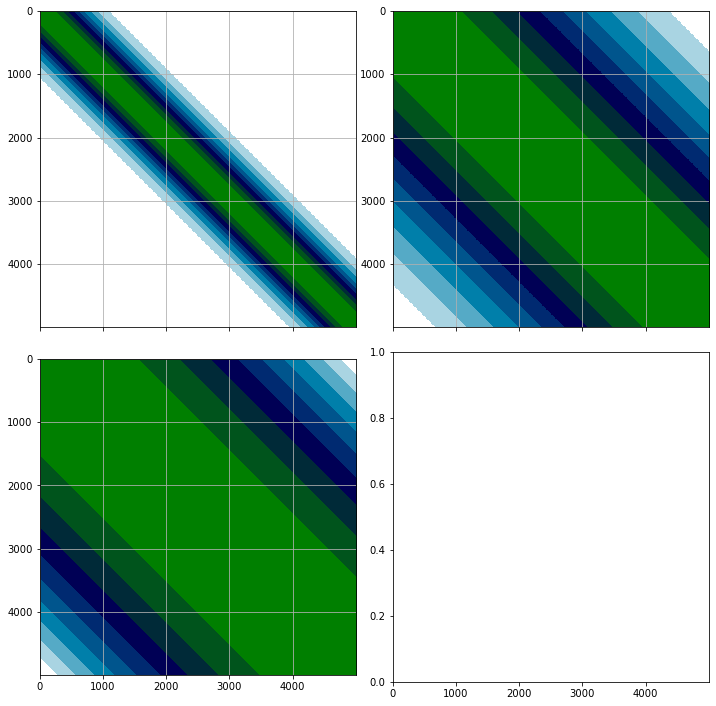

In [9]:
##################################################
#  Use this chunk for kernel: Square Exponential #
##################################################

#PLOT OF THE Kernel MATRICES 
fig, axis = plt.subplots(nrows = 2, ncols = 2, sharex = True, figsize=(10,10))

cmap = CM.get_cmap('ocean_r', 10)

for ax,i in zip(axis.flat, range(0,n_hyper) ):
    ax.imshow(K[i], interpolation="nearest", cmap=cmap)
    ax.grid(True)
    
fig.tight_layout()


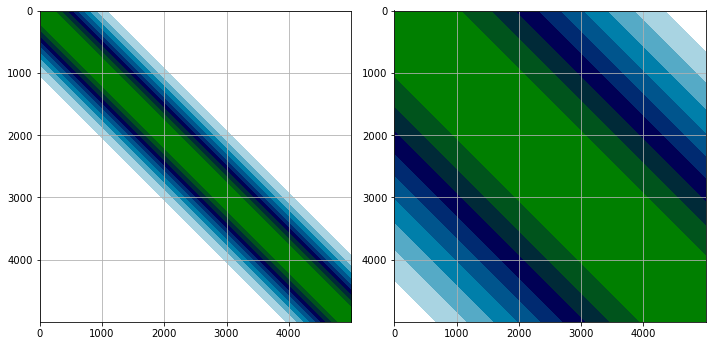

In [11]:
#For the paper

#PLOT OF THE Kernel MATRICES 
fig, axis = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize=(10,10))

cmap = CM.get_cmap('ocean_r', 10)

for ax,i in zip(axis.flat, range(0,n_hyper) ):
    ax.imshow(K[i], interpolation="nearest", cmap=cmap)
    ax.grid(True)
    
fig.tight_layout()



fig.savefig("rbf_cov.pdf", bbox_inches='tight')

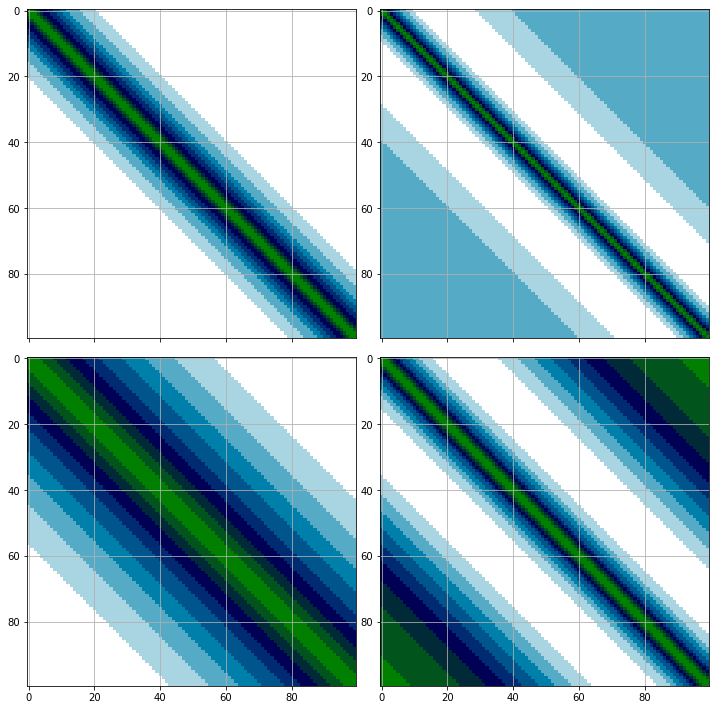

In [6]:
#########################################################################
# Use this chunk for kernels:  R.Q, Periodic, Matern, Gaussian Spectral #
#########################################################################

#PLOT OF THE Kernel MATRICES 

fig, axis = plt.subplots(nrows = 2, ncols = 2, sharex = True, figsize=(10,10))

cmap = CM.get_cmap('ocean_r', 10)

for ax,i in zip(axis.flat, range(0,n_hyper) ):
    ax.imshow(K[i], interpolation="nearest", cmap=cmap)
    ax.grid(True)
    
fig.tight_layout()
#fig.delaxes(axis[1][2])

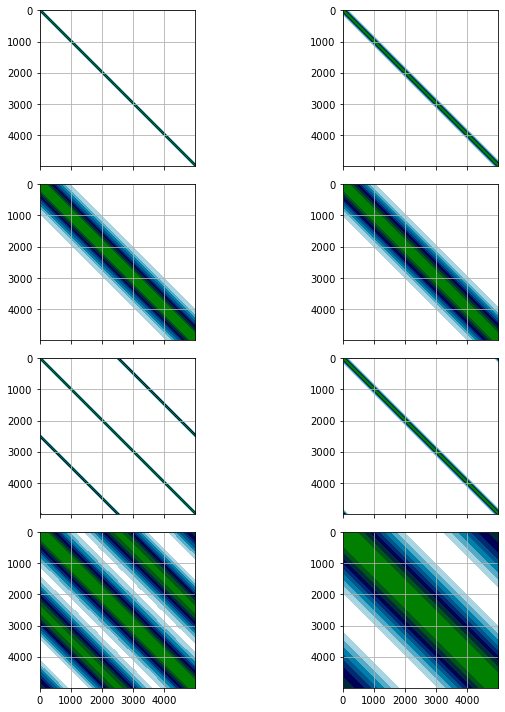

In [14]:
####################################################
# Use this chunk for kernels:     Locally Periodic #
####################################################

#PLOT OF THE Kernel MATRICES 

fig, axis = plt.subplots(nrows = 4, ncols = 2, sharex = True, figsize=(10,10))

cmap = CM.get_cmap('ocean_r', 10)

for ax,i in zip(axis.flat, range(0,n_hyper) ):
    ax.imshow(K[i], interpolation="nearest", cmap=cmap)
    ax.grid(True)
    
fig.tight_layout()
#fig.delaxes(axis[1][2])